In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings #emfanizei warnings gia allages se vivliothikes
import seaborn as sns
sns.set(rc={'xtick.labelsize':15,
            'ytick.labelsize':15})
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


%matplotlib qt
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('data_final155.csv')
df = df.round(decimals=2)
pd.set_option('max_columns',40,'max_rows',100)
df.shape

(167501, 39)

In [4]:
df1=df.iloc[167000:]
date = pd.to_datetime(df1['date'])
df=df.loc[:167000]

Χωρίζουμε το δείγμα σε train kai test

In [5]:
data_cols = ['mill_dp_mbar_pv_lagged','total_feed_ton_h_pv', 'fan_speed_rpm_pv', 'separator_speed_rpm_pv', 'grinding_pressure_bar_pv', 'mill_injection_water_m3_h_pv', 'bucket_elv_mtr_pwr_kw_pv','fly_ash_1_ton_h_pv', 'fly_ash_2_ton_h_pv']
target_cols = ['mill_dp_mbar_pv']

In [6]:
data = df[data_cols]
target = df[target_cols]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.4)
sc_x = RobustScaler()
sc_x.fit(x_train)
x_train_sc = sc_x.transform(x_train)
x_test_sc = sc_x.transform(x_test)
y_test = y_test.to_numpy(copy = True).flatten()

# Knn Model

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_jobs=-1)

grid ={'n_neighbors' : [3],
       'algorithm' : ['auto'],
       'p'  : [1],
       'leaf_size'  : [1,2],
       'weights' : ['distance']}
gs_knn = GridSearchCV(knn, grid, cv=10)
gs_knn.fit(x_train, y_train)
pred_knn = gs_knn.predict(x_test)


print("Mean Absolute Error (MAE): %.2f" % mae(y_test, pred_knn))
print("Mean Squared Error (MSE): %.2f" % mse(y_test, pred_knn))
print("R^2-score: %.2f" % r2( y_test, pred_knn))
print(gs_knn.best_estimator_)

Mean Absolute Error (MAE): 0.68
Mean Squared Error (MSE): 1.44
R^2-score: 0.84
KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=1,
                    weights='distance')


Κάνουμε plot ενα διάστημα για να δούμε πως τα παει το μοντέλο μας

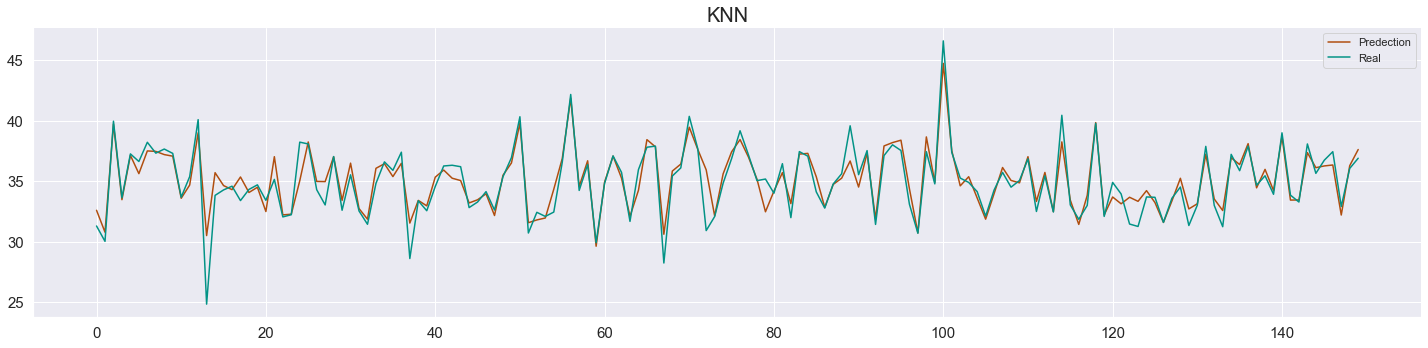

In [75]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(pred_knn[2100:2250],color = 'xkcd:burnt sienna',label = 'Predection',lw=1.5)
ax.plot(y_test[2100:2250], 'xkcd:teal',label= 'Real',lw=1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('KNN', size=20)
plt.tight_layout()
plt.legend()
plt.show()

# MLP regressor Neural Network

In [76]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

grid = {'hidden_layer_sizes' : (4,),
        'solver' : ['adam'],
        'learning_rate' : [ 'adaptive'],
        'learning_rate_init' : [0.01],
        'max_iter' : [50],
        'n_iter_no_change'  :  [7],
        'warm_start' : [True],
        'verbose'  :  [True],
        'early_stopping' : [True],
        'validation_fraction' : [0.2]}
gs_mlp= GridSearchCV(mlp, grid, cv=2)
gs_mlp.fit(x_train, y_train)
pred_mlp = gs_mlp.predict(x_test)

print("Mean Absolute Error (MAE): %.2f" % mae(y_test, pred_mlp))
print("Mean Squared Error (MSE): %.2f" % mse(y_test, pred_mlp))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((y_test- pred_mlp)**2)))
print("R^2-score: %.2f" % r2( y_test, pred_mlp))
print(gs_mlp.best_estimator_)

Iteration 1, loss = 1900.52523961
Validation score: -0.044156
Iteration 2, loss = 4.33679267
Validation score: 0.030717
Iteration 3, loss = 3.98139148
Validation score: 0.127425
Iteration 4, loss = 3.55218091
Validation score: 0.244142
Iteration 5, loss = 2.91267749
Validation score: 0.430645
Iteration 6, loss = 1.95653966
Validation score: 0.677902
Iteration 7, loss = 1.00166646
Validation score: 0.839557
Iteration 8, loss = 0.45862162
Validation score: 0.922406
Iteration 9, loss = 0.22607535
Validation score: 0.963228
Iteration 10, loss = 0.18028218
Validation score: 0.936064
Iteration 11, loss = 0.20481530
Validation score: 0.941979
Iteration 12, loss = 0.20429400
Validation score: 0.970286
Iteration 13, loss = 0.17648546
Validation score: 0.919103
Iteration 14, loss = 0.20317861
Validation score: 0.966987
Iteration 15, loss = 0.18456804
Validation score: 0.968318
Iteration 16, loss = 0.18715325
Validation score: 0.966882
Iteration 17, loss = 0.18383420
Validation score: 0.967292
It

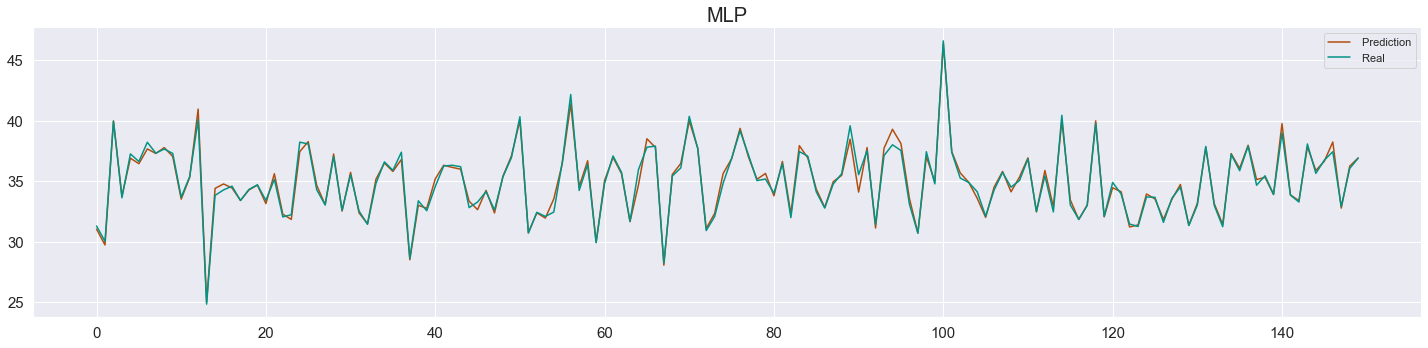

In [77]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(pred_mlp[2100:2250],'xkcd:burnt sienna',label = ' Prediction',lw=1.5)
ax.plot(y_test[2100:2250], 'xkcd:teal',label = ' Real',lw=1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('MLP', size=20)
plt.tight_layout()
plt.legend()
plt.show()

# XGBoost Regressor

In [78]:
#conda install -c anaconda py-xgboost στο τερματικο για εγκατασταση του XGboost

from xgboost import XGBRegressor

xgb = XGBRegressor()

grid = {'booster'  : ['gbtree'],
        'eta' :  [0.3],
        'n_estimators': [100],
        'learning_rate' : [0.05],
        'subsample'  :  [0.8],
        'min_child_weight' : [2],
        'max_depth' : [2],
        'objective'  : ['reg:squarederror'],
        'num_parallel_tree'  : [2],
        'verbosity'  : [2],
        'nthread' : [7],
        'colsample_bytree' : [0.9],
        'colsample_bylevel' : [1],
        'reg_lambda' : [0.9],
       'seed' : [31],
       'n_jobs': [-1]}
gs_xgb = GridSearchCV(xgb, grid, cv=5)
gs_xgb.fit(x_train, y_train)
pred_xgb = gs_xgb.predict(x_test)

print("Mean Absolute Error (MAE): %.2f" % mae(y_test, pred_xgb))
print("Mean Squared Error (MSE): %.2f" % mse(y_test, pred_xgb))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((y_test- pred_xgb)**2)))
print("R^2-score: %.2f" % r2( y_test, pred_xgb))
print(gs_xgb.best_estimator_)

[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:06:59] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:00] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:01] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:04] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:05] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:06] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:08] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:09] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:12] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:13] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:14] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:07:19] INFO: src/tree/updater_prune.cc:74: tree pruning end,

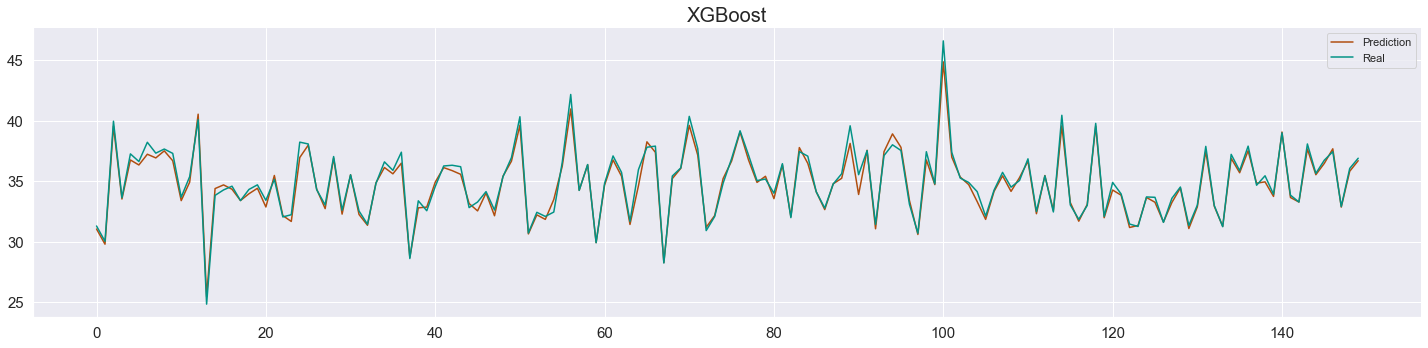

In [79]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(pred_xgb[2100:2250],color = 'xkcd:burnt sienna' ,lw=1.5,label ='Prediction')
ax.plot(y_test[2100:2250], 'blue',lw=1.5, color = 'xkcd:teal',label="Real")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('XGBoost', size=20)
plt.tight_layout()
plt.legend()
plt.show()

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

grid = {'n_jobs' : [-1],
        'warm_start' : [False, True],
        'n_estimators' : [10,50],
        'criterion' : ['mse'],
        'max_leaf_nodes'  :  [30],
        'min_samples_split'  :  [10],
        'max_depth' : [11],
        'verbose' : [2]}
gs_rf = GridSearchCV(rf, grid, cv=5)
gs_rf.fit(x_train, y_train)
pred_rf = gs_rf.predict(x_test)

print("Mean Absolute Error (MAE): %.2f" % mae(y_test, pred_rf))
print("Mean Squared Error (MSE): %.2f" % mse(y_test, pred_rf))
print("R^2-score: %.2f" % r2( y_test, pred_rf))
print(gs_rf.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Paralle

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50building tree 13 of 50
building tree 14 of 50

building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50building tree 22 of 50

building tree 23 of 50
building tree 24 of 50
building tree 25 of 50building tree 26 of 50

building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s


building tree 33 of 50
building tree 34 of 50
building tree 35 of 50building tree 36 of 50

building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s


Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 0.27
R^2-score: 0.97
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=2,
                      warm_start=False)


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


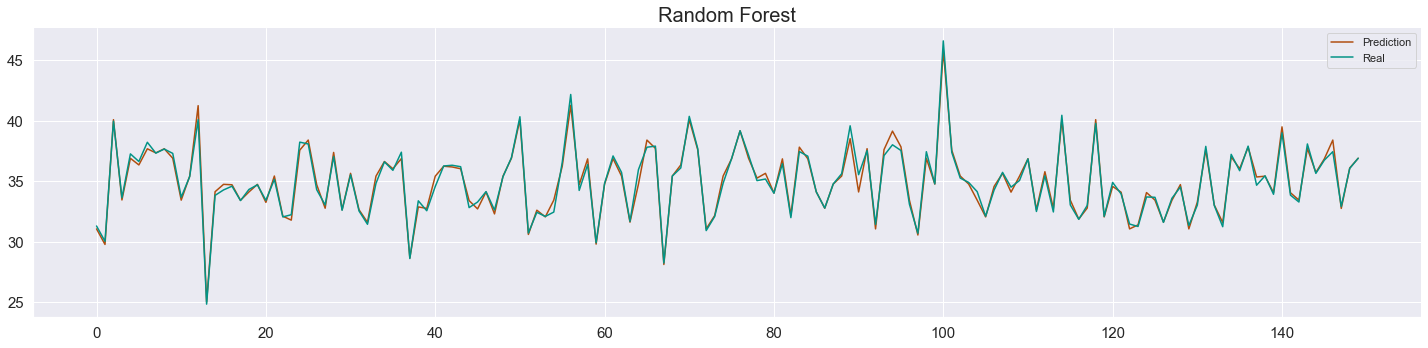

In [81]:
plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.plot(pred_rf[2100:2250],color = 'xkcd:burnt sienna' ,lw=1.5,label ='Prediction')
ax.plot(y_test[2100:2250], color = 'xkcd:teal' ,lw=1.5,label ='Real')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Random Forest', size=20)
plt.tight_layout()
plt.legend()
plt.show()

# test tous kaliterous

In [82]:
plt.figure(figsize=(140,30))
df2=df1[data_cols]
test = sc_x.transform(df2)
df3=df1[target_cols].to_numpy(copy=True)
pr=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=7, num_parallel_tree=2,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.9, scale_pos_weight=1, seed=31, silent=None,
             subsample=0.8, verbosity=2)

pr.fit(x_train_sc,y_train)
pre=pr.predict(test)
print("Mean Absolute Error (MAE): %.2f" % mae(df3, pre))
print("Mean Squared Error (MSE): %.2f" % mse(df3, pre))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((df3- pre)**2)))
print("R^2-score: %.2f" % r2( df3, pre))


ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by RobustScaler.

<Figure size 10080x2160 with 0 Axes>

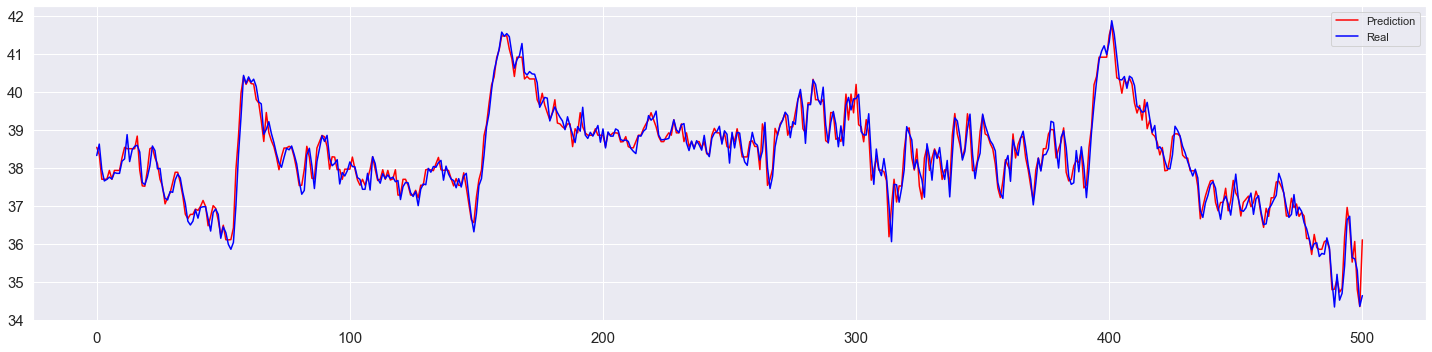

In [45]:
plt.figure(figsize=(20,5))
pre=pr.predict(test)
plt.plot(pre,'red', label = 'Prediction')
plt.plot(df3,'blue',label = 'Real')
plt.legend()
plt.tight_layout()

In [69]:
plt.figure(figsize=(100,30))
df2=df1[data_cols]
test = sc_x.transform(df2)
df3=df1[target_cols].to_numpy(copy=True)
pr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=2,
                      warm_start=True)
pr.fit(x_train_sc,y_train)
pre=pr.predict(test)
print("Mean Absolute Error (MAE): %.2f" % mae(df3, pre))
print("Mean Squared Error (MSE): %.2f" % mse(df3, pre))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((df3- pre)**2)))
print("R^2-score: %.2f" % r2( df3, pre))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50building tree 7 of 50
building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50building tree 13 of 50

building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s


building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50building tree 39 of 50

building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Mean Absolute Error (MAE): 0.24
Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 1.73
R^2-score: 0.94


<Figure size 7200x2160 with 0 Axes>

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


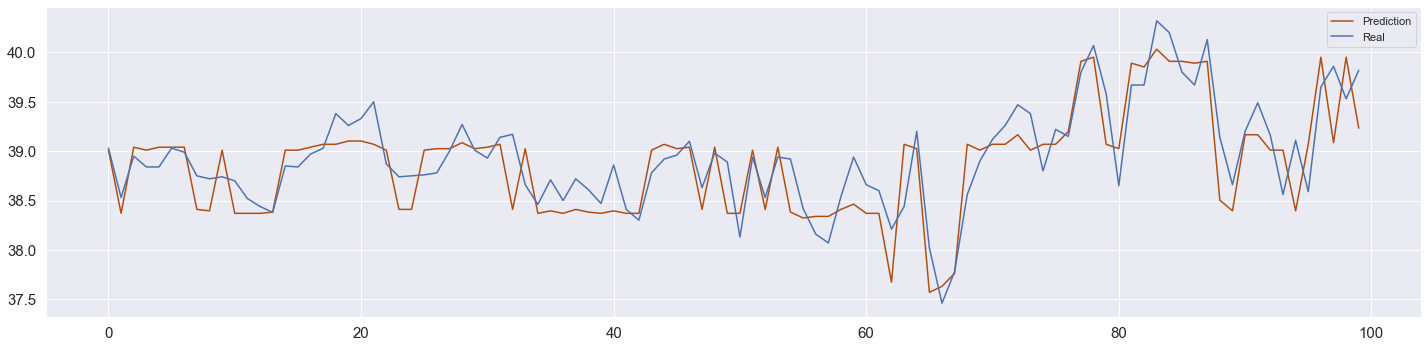

In [70]:
plt.figure(figsize=(20,5))
pre=pr.predict(test)
plt.plot(pre[200:300],color = 'xkcd:burnt sienna', label = 'Prediction')
plt.plot(df3[200:300],label = 'Real')
plt.legend()
plt.tight_layout()

In [23]:
print("Mean Absolute Error (MAE): %.2f" % mae(df3, pre))
print("Mean Squared Error (MSE): %.2f" % mse(df3[150:200], pre[150:200]))
print("R^2-score: %.2f" % r2( df3[150:200], pre[150:200]))

Mean Absolute Error (MAE): 1.09
Mean Squared Error (MSE): 1.55
R^2-score: -0.36


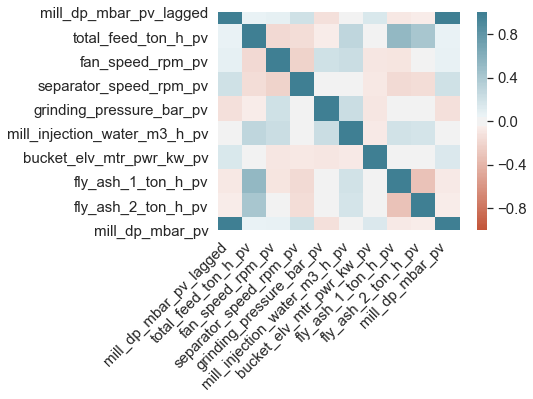

In [25]:
corr = df[data_cols + target_cols].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [47]:
h = df[df['cement_type_cpiv_bool_pv']==1]
g = df[df['cement_type_cpiv_bool_pv']==0]
h=h['mill_dp_mbar_pv']
g = g['mill_dp_mbar_pv']
import statsmodels.stats.api as sms

X1, X2 = g , h

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print (cm.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      1.2634      0.016     80.537      0.000       1.233       1.294


In [ ]:
cm.summary()

In [ ]:
from scipy import stats
stats.ttest_ind(h,g)


In [11]:
df[df['cement_type_cpii_bool_pv']==0].describe()

,Unnamed: 0,total_feed_ton_h_pv,clinker_ton_h_pv,limestone_ton_h_pv,slag_ton_h_pv,gypsum_ton_h_pv,pozzolane_ton_h_pv,fly_ash_1_ton_h_pv,fly_ash_2_ton_h_pv,total_feed_ton_h_sp,mill_motor_pwr_kw_pv,fan_pwr_kw_pv,fan_speed_rpm_pv,grinding_pressure_bar_sp,grinding_pressure_bar_pv,bucket_elv_mtr_pwr_kw_pv,mill_in_press_mbar_pv,mill_in_press_mbar_sp,mill_in_temp_c_pv,mill_exit_temp_c_pv,mill_dp_mbar_pv,mill_out_press_mbar_pv,separator_pwr_kw_pv,separator_speed_rpm_pv,mill_injection_water_m3_h_pv,roller_1_bed_depth_mm_pv,roller_2_bed_depth_mm_pv,roller_3_bed_depth_mm_pv,mill_vibration_mm_s_pv,gearbox_1_vibration_mm_s_pv,gearbox_2_vibration_mm_s_pv,grinding_aid_l_h_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv,mill_operation,separator_pwr_kw_pv_lagged,mill_dp_block_1,mill_dp_mbar_pv_lagged
count,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000,117802.0,117802.000000,117802.000000,117802.000000,117802.000000,117802.000000
mean,86313.183469,80.282982,51.735240,3.454288,0.000969,1.885889,4.472017,10.194553,7.728833,80.646623,1064.770883,452.866760,871.355644,118.072805,116.926591,4.874193,5.312632,5.212682,143.331261,111.861492,34.601358,39.780067,57.444721,751.057301,2.222524,9.102402,5.800531,7.045652,0.887173,2.168836,2.455381,23.323505,0.0,0.999996,0.990849,57.449033,34.687395,34.617295
std,48309.326240,13.115740,7.568578,3.038114,0.113050,0.618627,5.611880,12.918814,11.926809,12.101443,112.322918,37.302382,83.339521,3.808965,4.139800,0.149217,1.347723,1.298261,12.442721,6.232008,2.822681,5.513176,1.656450,40.204127,0.625167,14.675494,12.948514,15.565215,0.456427,0.610180,0.706398,14.188009,0.0,0.001457,0.091564,1.713769,2.697068,2.789225
min,0.000000,25.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.500000,0.000000,0.280000,357.000000,60.000000,90.000000,4.400000,0.000000,0.000000,0.000000,87.160000,0.710000,0.460000,53.650000,34.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,10.320000,1.560000
25%,44857.250000,69.660000,48.470000,1.670000,0.000000,1.560000,0.000000,0.010000,0.070000,71.000000,1022.340000,428.820000,812.120000,119.000000,116.000000,4.780000,4.580000,4.740000,135.490000,108.380000,32.750000,38.260000,56.660000,733.380000,1.840000,2.940000,1.882500,1.460000,0.570000,2.000000,2.000000,16.880000,0.0,1.000000,1.000000,56.670000,32.800000,32.760000
50%,88576.500000,84.300000,52.850000,2.100000,0.000000,1.840000,2.880000,0.020000,0.080000,84.200000,1073.675000,445.980000,848.575000,120.000000,118.000000,4.860000,5.040000,5.000000,141.860000,111.570000,34.560000,40.480000,57.330000,752.130000,2.460000,8.030000,3.800000,3.780000,0.820000,2.000000,2.000000,20.230000,0.0,1.000000,1.000000,57.330000,34.590000,34.550000
75%,128379.750000,90.820000,56.380000,5.720000,0.000000,2.120000,4.000000,25.440000,23.920000,90.000000,1126.080000,472.880000,952.000000,120.000000,119.500000,4.960000,5.620000,5.300000,150.350000,114.620000,36.390000,42.520000,58.060000,772.680000,2.700000,10.700000,6.020000,8.380000,1.160000,2.500000,3.000000,23.680000,0.0,1.000000,1.000000,58.060000,36.430000,36.400000
max,167000.000000,116.190000,79.850000,23.550000,24.220000,10.000000,24.920000,32.920000,32.310000,100.000000,1594.590000,599.370000,1190.000000,120.000000,126.000000,10.360000,31.160000,31.220000,298.550000,155.710000,58.680000,60.200000,162.000000,846.580000,2.890000,142.000000,122.000000,154.430000,6.800000,7.000000,8.000000,75.000000,0.0,1.000000,1.000000,162.000000,63.630000,59.630000
